In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd


In [2]:
citydata_df = pd.read_csv("Resources/city_data.csv")
ridedata_df = pd.read_csv("Resources/ride_data.csv")
rideshare_df = pd.merge(citydata_df, ridedata_df, how = 'outer', on = 'city')
rideshare_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [3]:
rideshare_df = rideshare_df.rename(columns = {'city':'City',
                                             'driver_count':'Driver Count',
                                             'type':'Type',
                                             'date':'Date',
                                             'fare':'Fare',
                                             'ride_id':'Ride ID'})
rideshare_df.head()

,City,Driver Count,Type,Date,Fare,Ride ID
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [4]:
rideshare_df = rideshare_df.fillna(0)
rideshare_df.head()

,City,Driver Count,Type,Date,Fare,Ride ID
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [16]:
avg_fare = rideshare_df.groupby(["City"])["Fare"].mean()
total_cityrides = rideshare_df["City"].value_counts()
total_drivers = rideshare_df.groupby(["City"])["Driver Count"].sum()
citytype = rideshare_df["Type"].value_counts()

In [9]:
city_type = rideshare_df.groupby(["Type"])
city_type.groups.keys()
urban_group = city_type.get_group("Urban")
suburban_group = city_type.get_group("Suburban")
rural_group = city_type.get_group("Rural")


,City,Driver Count,Type,Date,Fare,Ride ID
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


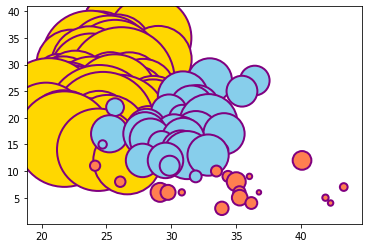

In [24]:
urban_avg_fare = urban_group.groupby(["City"])["Fare"].mean()
urban_total_cityrides = urban_group["City"].value_counts()
urban_total_drivers = urban_group.groupby(["City"])["Driver Count"].sum()
suburban_avg_fare = suburban_group.groupby(["City"])["Fare"].mean()
suburban_total_cityrides = suburban_group["City"].value_counts()
suburban_total_drivers = suburban_group.groupby(["City"])["Driver Count"].sum()
rural_avg_fare = rural_group.groupby(["City"])["Fare"].mean()
rural_total_cityrides = rural_group["City"].value_counts()
rural_total_drivers = rural_group.groupby(["City"])["Driver Count"].sum()
plt.scatter(urban_avg_fare,urban_total_cityrides,urban_total_drivers * 5, color=["gold"], edgecolor = 'purple', marker="o", linewidth = 2)
plt.scatter(suburban_avg_fare,suburban_total_cityrides,suburban_total_drivers * 5, color=["skyblue"], edgecolor = 'purple', marker="o", linewidth = 2)
plt.scatter(rural_avg_fare,rural_total_cityrides,rural_total_drivers * 5, color=["coral"], edgecolor = 'purple', marker="o", linewidth = 2)